In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

t_df = pd.read_json("./data/train.json")
print(type(t_df))
print(t_df.shape) # 49,352 obs and 15 vars
print(t_df.columns)
t_df.head()

<class 'pandas.core.frame.DataFrame'>
(49352, 15)
Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')


,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


15 Variables: 
- 3 float: Bathrooms, Latitude, Longitude
- 3 int: Bedrooms, listing_id, price 
- 7 str: building_id, created, description, display_address, street_address, interest_level, manager_id, 
- 2 list: features, photos

Some initial thoughts:
- Interest_level: categorical variable. Response variable (dependent variable). Majority of obs are 'Low interest' thus our algo should primarily be more geared towards correctly identifying this feature to minimize log-loss.
- Display_address and street_address: categorical and unique. These two might be redundant and show colinearity to each other and with latitude and longitude vars.
- Description: word and sentence analysis. 
- Interest_level, bedrooms and bathrooms: only variables with small number of unique observations: 3, 9 and 15, respectively    

In [2]:
# variable name, num of unique obs and variable type:
for i in t_df.columns:
    try: 
        print i,'   ', len(list(set(t_df.loc[:,i]))), 'unique obs','               ',str(type(t_df.loc[:,i].iloc[0]))
    except:
        print '=> problems getting unique info: list type'
        next

bathrooms     15 unique obs                 <type 'numpy.float64'>
bedrooms     9 unique obs                 <type 'numpy.int64'>
building_id     7585 unique obs                 <type 'unicode'>
created     48675 unique obs                 <type 'unicode'>
description     38244 unique obs                 <type 'unicode'>
display_address     8826 unique obs                 <type 'unicode'>
features     => problems getting unique info: list type
interest_level     3 unique obs                 <type 'unicode'>
latitude     2335 unique obs                 <type 'numpy.float64'>
listing_id     49352 unique obs                 <type 'numpy.int64'>
longitude     1677 unique obs                 <type 'numpy.float64'>
manager_id     3481 unique obs                 <type 'unicode'>
photos     => problems getting unique info: list type
price     2808 unique obs                 <type 'numpy.int64'>
street_address     15358 unique obs                 <type 'unicode'>


### Response Variable: interest_level

The majority of listings in the training set are classified 'low'. Basically our algo should be particularly good at predicting 'low interest' listings as it will minimize log-loss.

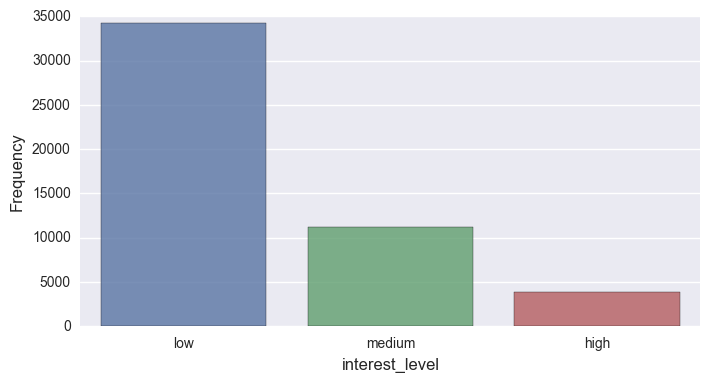

In [3]:
int_level = t_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('interest_level', fontsize=12)
plt.show()

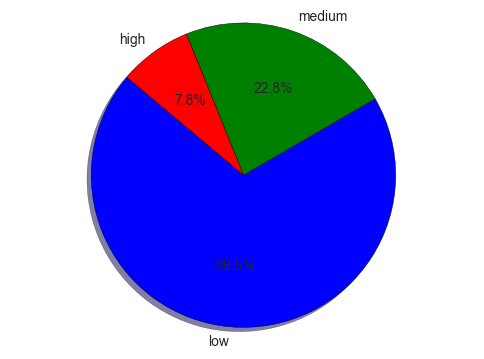

In [4]:
plt.pie(int_level,labels= ['low','medium','high'], autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

### Numerical Variables

In [5]:
##### cont variables analysis
t_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


**Bathrooms:**

- Most listings are showing 1 bathroom
- Violin chart Bathrooms vs Int Level displays same distribution for bathrooms across interest levels
- Number of bathrooms as a continuous variable is not very informative.
- It could make sense to create a categorical variable: "bath+1" = Yes or Not
    

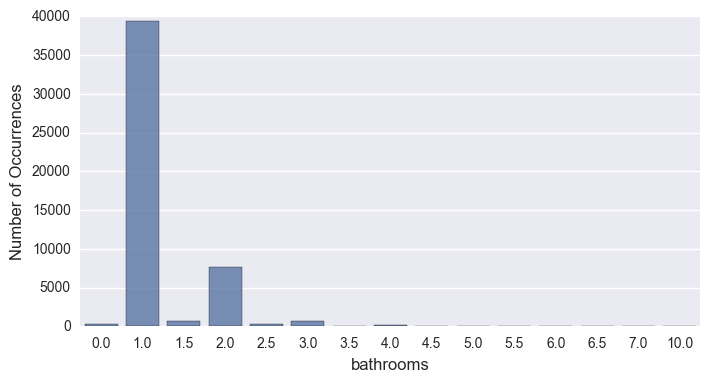

In [6]:
cnt_srs = t_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

/Users/mu/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


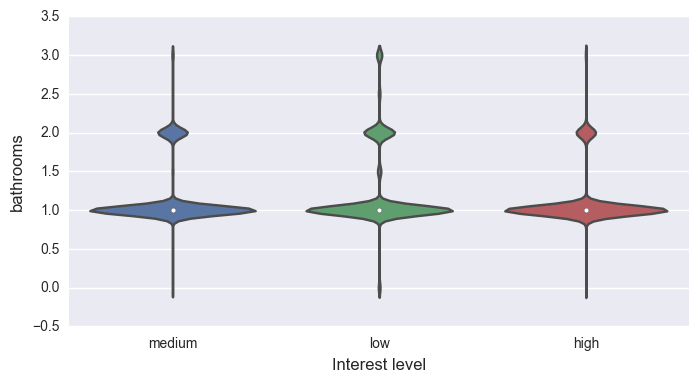

In [7]:
t_df['bathrooms'].ix[t_df['bathrooms']>3] = 3
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=t_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

**Bedrooms:**

- More bell-shapped distribution. Probably it could be normalized further using Box-Cox
- However, histogram by interest level shows that group distributions are less normal when filtering out high interest level    

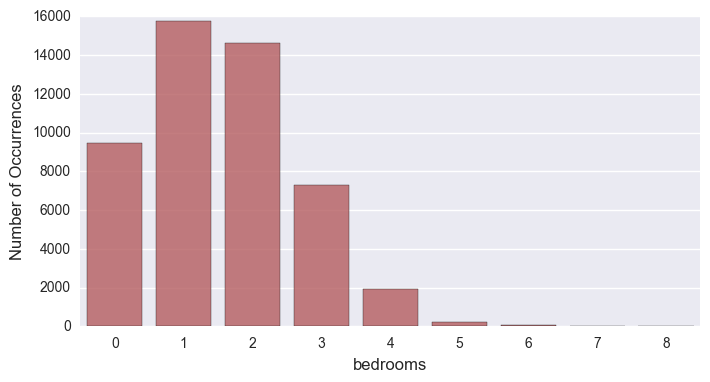

In [8]:
cnt_srs = t_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

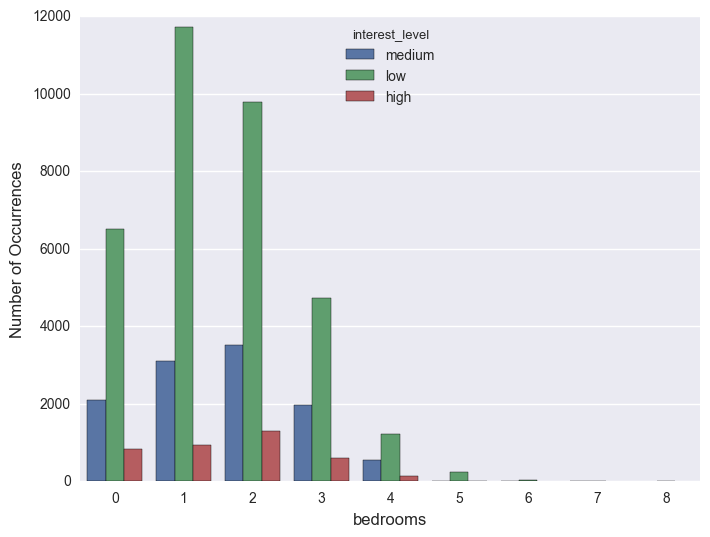

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=t_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()


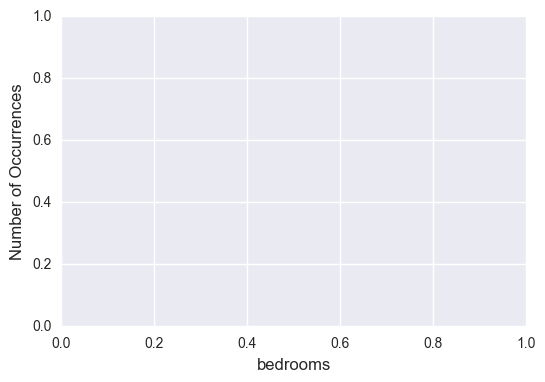

In [10]:
# t_df.hist(column="bedrooms", by='interest_level')          
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()



**Price:**
- Price frequency distribution seems to be skewed to the right.
- In addition, some outliers creating high kurtosis to the rigth
- Removing them should be fine yet it doesn't eliminate the skewness problem    

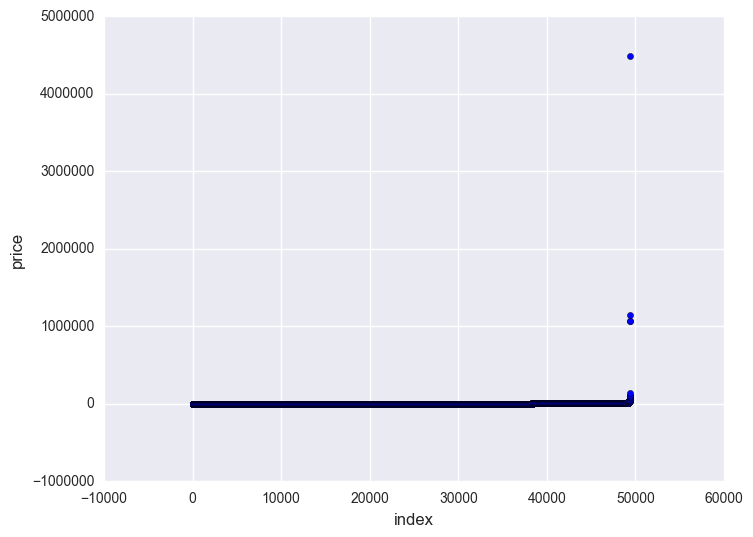

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(range(t_df.shape[0]), np.sort(t_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

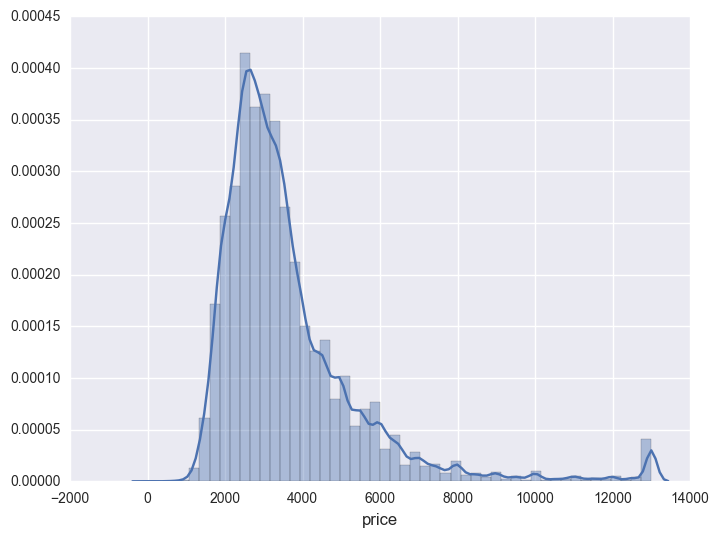

In [12]:
# removing outliers:
ulimit = np.percentile(t_df.price.values, 99)
t_df['price'].ix[t_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(t_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

**Latitude/Longitude:**
- The latitude values are primarily between 40.6 and 40.9.
- The longitude values range between -73.8 and -74.02. 
- Listings seems to be more normally distributed in terms of latitude. 
- Most of the listings seem to be focused on Manhattan area

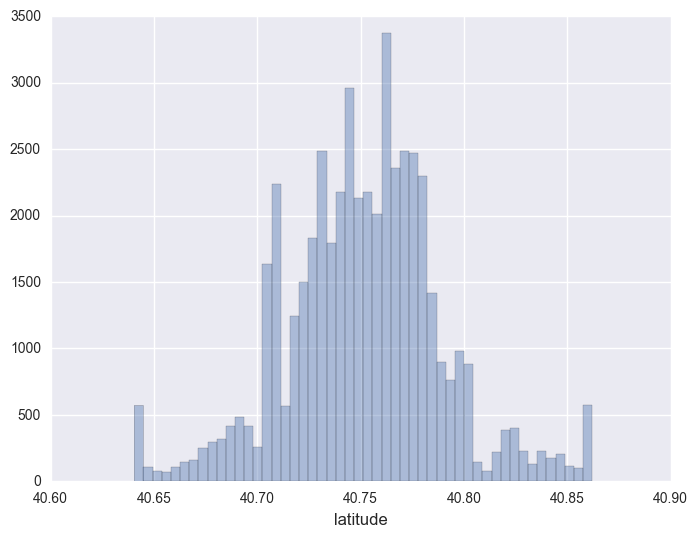

In [13]:
llimit = np.percentile(t_df.latitude.values, 1)
ulimit = np.percentile(t_df.latitude.values, 99)
t_df['latitude'].ix[t_df['latitude']<llimit] = llimit
t_df['latitude'].ix[t_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(t_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

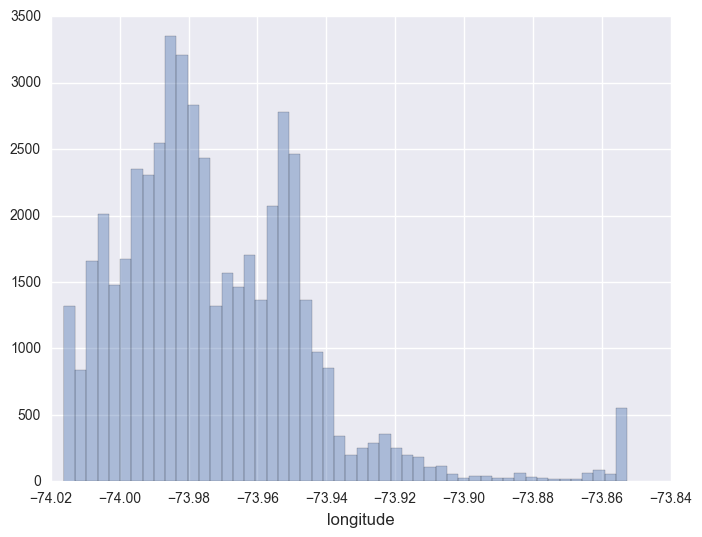

In [14]:
llimit = np.percentile(t_df.longitude.values, 1)
ulimit = np.percentile(t_df.longitude.values, 99)
t_df['longitude'].ix[t_df['longitude']<llimit] = llimit
t_df['longitude'].ix[t_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(t_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.show()

In [15]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(t_df['longitude'].values, t_df['latitude'].values)
m.hexbin(x, y, gridsize=200, bins='log', cmap=cm.YlOrRd_r);

ImportError: No module named basemap

**Created:**
- Time period training set is 04/01/2016 to 29/06/2016.
- Listing creations are higher day 12 and 21 (outliers). 
- On average there are more listing creations during 1st half of the month than second half. 
- 1-7 AM is the favourite time range to create listings (bit weird). 

In [ ]:
# Training Set time span
t_df["created"] = pd.to_datetime(t_df["created"]) # transform to datetime object
t_df["date_created"] = t_df["created"].dt.date
cnt_srs = t_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

In [ ]:
# Calendar Month Day Analysis
t_df["hour_created"] = map(lambda x: x.day ,t_df["date_created"])
cnt_srs = t_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Time Analysis
t_df["hour_created"] = t_df["created"].dt.hour
cnt_srs = t_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

### Categorical Variables

**Display Address:**
- Broadway, East 34th, 2nd Avenue and Wall Street are the most frequent listings (+300 each).
- There must be some relationship between Display Address and Interest_level => look into it further
- Most of the display addresses occur more than 100 times

In [ ]:
print 'Top 10 Display Addresses', cnt_srs.order(ascending=False).head(10)
print 65*'-'
print 'Bottom 10 Display Addresses',cnt_srs.order(ascending=False).tail(10)

In [ ]:
da_df = t_df.groupby(['display_address','interest_level'])['display_address'].agg(['count','sum'])
da_df.head()

In [ ]:
cnt_srs = t_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

**Number of Photos:**
- Bell-shapped distribution.
- The average listing displays between 3-8 pictures
- Violin plot shows no significant differences in mean and distribution when comparing interest_level vs num_photos
- The most remarkable fact is the concentration in "low interest_level" for listings with nil pictures 

In [ ]:
t_df["num_photos"] = t_df["photos"].apply(len) # 'num_photos' are list object remember 
cnt_srs = t_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [ ]:
t_df['num_photos'].ix[t_df['num_photos']>12] = 12 # 
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=t_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

**Number of Features:**
- Feature words look generic across listings so this is great to count words/features
- Average listing displays 2-5 features
- However, the Num of features per listing distribution is skewed to the right
- 'Medium Interest' listings are the ones with a higher average num of features
- Interestingly low and high interest level listings have similar num of features.
- It's clear than some features will have more relevance than others => look into it


In [ ]:
 t_df["num_features"].head()

In [ ]:
t_df["num_features"] = t_df["features"].apply(len) # another list object
cnt_srs = t_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

In [ ]:
t_df['num_features'].ix[t_df['num_features']>17] = 17
plt.figure(figsize=(12,10))
sns.violinplot(y="num_features", x="interest_level", data=t_df, order =['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

In [ ]:
t_df['description']

**Listing ID:**


In [ ]:
len(t_df['listing_id'].value_counts()) == len(t_df) #nothing to see here...this is a unique record ID

**Building ID:**


In [ ]:
t_df['building_id'].replace(to_replace='0', value=np.nan, inplace=True)
bid = t_df.groupby(['building_id', 'interest_level'])

In [ ]:
bid['building_id'].agg(['count']).iloc[1:10,:]

In [ ]:
cnt_srs = t_df['building_id'].value_counts()

for i in [2, 5, 10, 25, 50, 100, 200, 300]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

In [ ]:
# big building feature
cnt_srs = pd.DataFrame(t_df['building_id'].value_counts())
cnt_srs['BigBuilding'] = map(lambda x: 1 if x > 5 else np.nan, cnt_srs['building_id'])
cnt_srs = cnt_srs.rename(columns={'building_id': 'count_building_id'})
cnt_srs.index.name = 'building_id'
cnt_srs.reset_index(inplace=True)

#setup the main data frame for merging the value counts back in
dfm = pd.DataFrame(t_df['building_id'])
dfm['BigBuilding'] = pd.Series()
dfm['count_building_id'] = pd.Series()
dfm.drop(['BigBuilding','count_building_id'], inplace=True) #drops the extra two rows introduced by coercion to df

In [ ]:
df = pd.merge(dfm, cnt_srs,
              how='right',
              left_on=['BigBuilding', 'building_id', 'count_building_id'],
              right_on=['BigBuilding', 'building_id', 'count_building_id'],
             )

In [3]:
df = t_df

In [4]:
from geopy.distance import vincenty

In [5]:
tube_lat_long = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv') \
    [['Station_Name','Station_Latitude','Station_Longitude']]
    
tube_lat_long = tube_lat_long.groupby('Station_Name').agg(['mean'])
stations = list(tube_lat_long.to_records(index=False))
records = list(df.to_records(index=False))
listings = [(rec[8], rec[10]) for i, rec in enumerate(records)]

In [10]:
%%timeit
distance = []
for l in listings:
    for s in stations:
        temp = [100000]
        dist = vincenty(l, s).meters
        if dist < min(temp):
            temp.append(dist)
    distance.append(temp)

KeyboardInterrupt: 